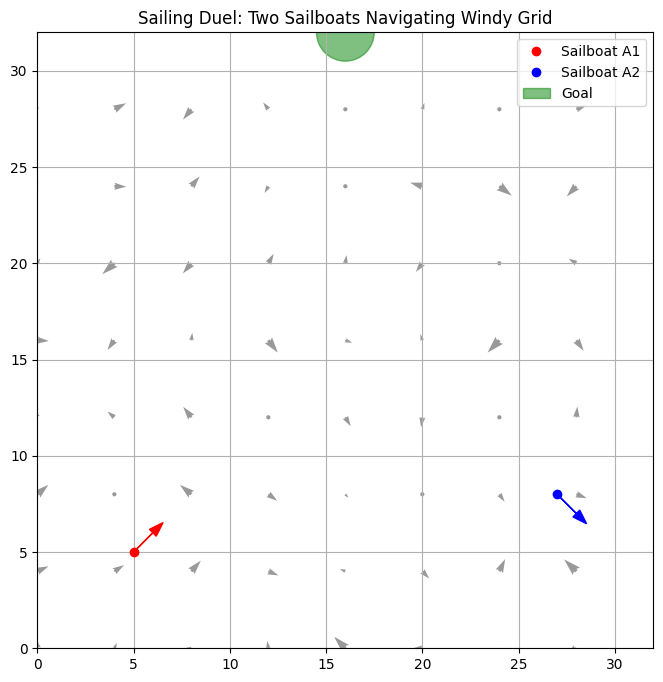

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 32

# Create wind field: random for demo
np.random.seed(42)
wind_field = np.random.uniform(-1, 1, size=(grid_size, grid_size, 2))

# Agent positions and velocities
agent1 = {'pos': (5, 5), 'vel': (1, 1)}  # bottom-left-ish
agent2 = {'pos': (27, 8), 'vel': (1, -1)} # bottom-right-ish
target = (16, 32)  # top center

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
U = wind_field[:, :, 0]
V = wind_field[:, :, 1]

# Subsample wind field for visibility
skip = 4
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
          U[::skip, ::skip], V[::skip, ::skip], 
          angles='xy', scale_units='xy', scale=1.5, alpha=0.4)

# Draw agents
ax.plot(*agent1['pos'], 'ro', label='Sailboat A1')
ax.plot(*agent2['pos'], 'bo', label='Sailboat A2')

# Draw velocities
ax.arrow(agent1['pos'][0], agent1['pos'][1], 
         agent1['vel'][0], agent1['vel'][1], color='r', head_width=0.5)
ax.arrow(agent2['pos'][0], agent2['pos'][1], 
         agent2['vel'][0], agent2['vel'][1], color='b', head_width=0.5)

# Draw goal zone
ax.add_patch(plt.Circle(target, radius=1.5, color='green', alpha=0.5, label='Goal'))

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_title("Sailing Duel: Two Sailboats Navigating Windy Grid")
ax.set_aspect('equal')
ax.legend(loc='upper right')
plt.grid(True)
plt.show()


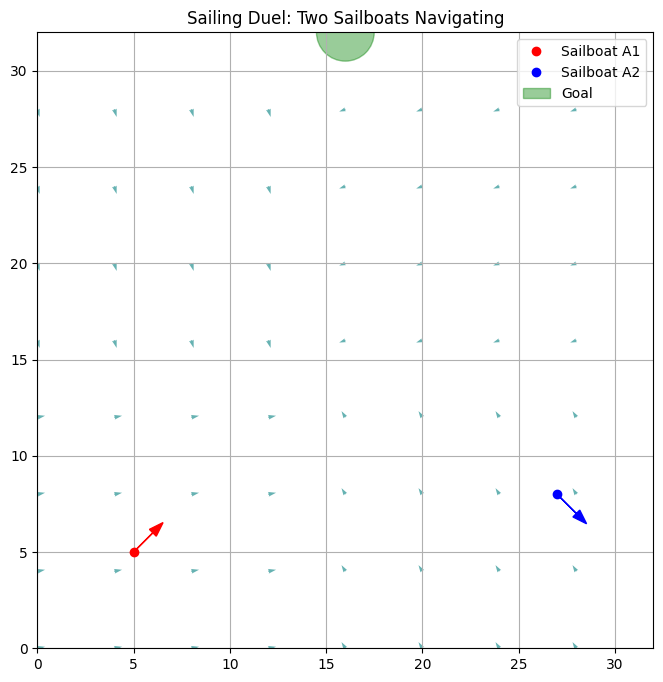

In [6]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 32

# Initialize wind field with zeros
wind_field = np.zeros((grid_size, grid_size, 2))

# Define 4 wind zones with different directions and intensities
zones = [
    ((0, 16), (0, 16), (1.0, 0.2)),    # Top-left: wind blowing right-up
    ((0, 16), (16, 32), (-0.5, 0.8)),  # Top-right: wind blowing left-up
    ((16, 32), (0, 16), (0.3, -1.0)),  # Bottom-left: wind blowing right-down
    ((16, 32), (16, 32), (-0.8, -0.3)) # Bottom-right: wind blowing left-down
]

for (x_start, x_end), (y_start, y_end), (wx, wy) in zones:
    wind_field[x_start:x_end, y_start:y_end, 0] = wx
    wind_field[x_start:x_end, y_start:y_end, 1] = wy

# Agent positions and velocities
agent1 = {'pos': (5, 5), 'vel': (1, 1)}
agent2 = {'pos': (27, 8), 'vel': (1, -1)}
target = (16, 32)  # goal position (top-center)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
U = wind_field[:, :, 0]
V = wind_field[:, :, 1]

skip = 4  # Subsample for visibility
ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
          U[::skip, ::skip], V[::skip, ::skip], 
          angles='xy', scale_units='xy', scale=2.5, alpha=0.6, color='teal')

# Draw agents
ax.plot(*agent1['pos'], 'ro', label='Sailboat A1')
ax.plot(*agent2['pos'], 'bo', label='Sailboat A2')

# Draw velocity arrows
ax.arrow(agent1['pos'][0], agent1['pos'][1], 
         agent1['vel'][0], agent1['vel'][1], color='r', head_width=0.5)
ax.arrow(agent2['pos'][0], agent2['pos'][1], 
         agent2['vel'][0], agent2['vel'][1], color='b', head_width=0.5)

# Draw goal zone
goal_circle = plt.Circle(target, radius=1.5, color='green', alpha=0.4, label='Goal')
ax.add_patch(goal_circle)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_title("Sailing Duel: Two Sailboats Navigating")
ax.set_aspect('equal')
ax.legend(loc='upper right')
plt.grid(True)
plt.show()


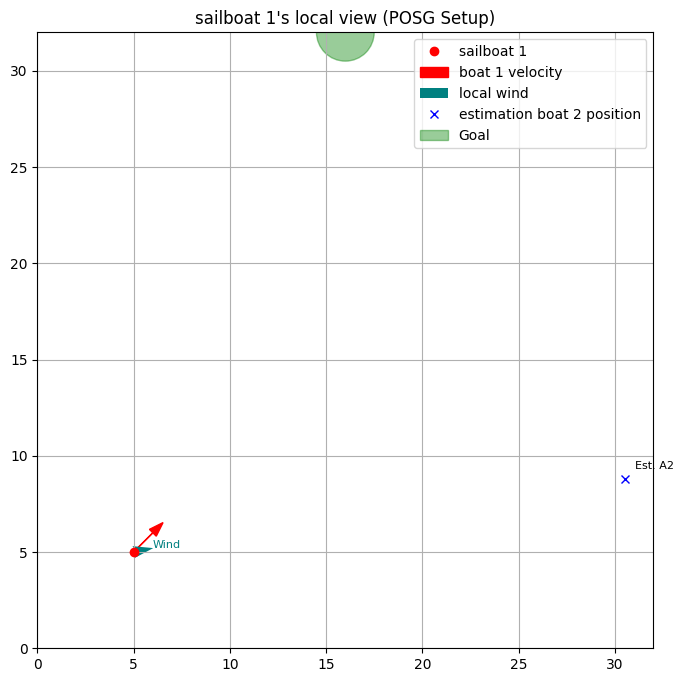

In [9]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 32

# Wind zones (hidden from the agent)
wind_field = np.zeros((grid_size, grid_size, 2))
zones = [
    ((0, 16), (0, 16), (1.0, 0.2)),    
    ((0, 16), (16, 32), (-0.5, 0.8)),  
    ((16, 32), (0, 16), (0.3, -1.0)),  
    ((16, 32), (16, 32), (-0.8, -0.3)) 
]
for (x0, x1), (y0, y1), (wx, wy) in zones:
    wind_field[x0:x1, y0:y1, 0] = wx
    wind_field[x0:x1, y0:y1, 1] = wy

# Agents and goal
agent1 = {'pos': np.array([5, 5]), 'vel': np.array([1, 1])}
agent2 = {'pos': np.array([27, 8]), 'vel': np.array([1, -1])}
target = np.array([16, 32])

# Agent 1's local view
x1, y1 = agent1['pos']
local_wind = wind_field[x1, y1]

# Estimate opponent's position (with noise)
np.random.seed(0)
noise = np.random.normal(0, 2, size=2)
estimated_agent2_pos = agent2['pos'] + noise

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("sailboat 1's local view (POSG Setup)")

# Plot agent A1
ax.plot(*agent1['pos'], 'ro', label='sailboat 1')
ax.arrow(*agent1['pos'], *agent1['vel'], color='r', head_width=0.5, label='boat 1 velocity')

# Plot local wind at A1 position
wind_scale = 2.5
ax.quiver(x1, y1, local_wind[0], local_wind[1],
          angles='xy', scale_units='xy', scale=1 / max(np.linalg.norm(local_wind), 0.1),
          color='teal', label='local wind')
ax.annotate("Wind", (x1 + local_wind[0], y1 + local_wind[1]), color='teal', fontsize=8)

# Plot estimated opponent
ax.plot(*estimated_agent2_pos, 'bx', label='estimation boat 2 position')
ax.annotate("Est. A2", estimated_agent2_pos + 0.5, fontsize=8)

# Plot goal
goal_circle = plt.Circle(target, radius=1.5, color='green', alpha=0.4, label='Goal')
ax.add_patch(goal_circle)

# Formatting
ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.grid(True)
ax.legend(loc='upper right')
plt.show()


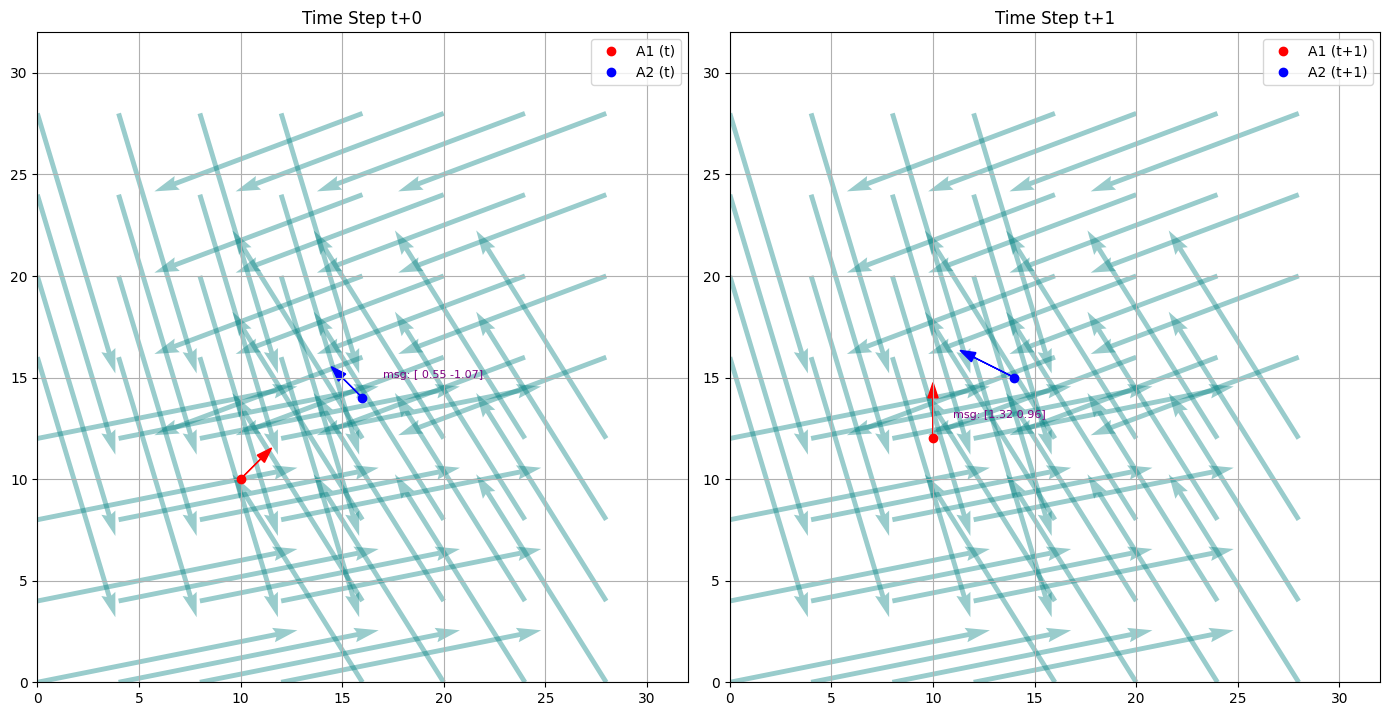

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Grid and wind setup
grid_size = 32
wind_field = np.zeros((grid_size, grid_size, 2))

# Define wind zones
zones = [
    ((0, 16), (0, 16), (1.0, 0.2)),
    ((0, 16), (16, 32), (-0.5, 0.8)),
    ((16, 32), (0, 16), (0.3, -1.0)),
    ((16, 32), (16, 32), (-0.8, -0.3)),
]
for (x_start, x_end), (y_start, y_end), (wx, wy) in zones:
    wind_field[x_start:x_end, y_start:y_end, 0] = wx
    wind_field[x_start:x_end, y_start:y_end, 1] = wy

# Positions and velocities at time t and t+1
pos_t = {
    "A1": np.array([10, 10]),
    "A2": np.array([16, 14])
}
vel_t = {
    "A1": np.array([1, 1]),
    "A2": np.array([-1, 1])
}

# Messages
sigma = 0.5
wind_A2 = wind_field[pos_t["A2"][0], pos_t["A2"][1]]
msg_A2_to_A1 = wind_A2 + np.random.normal(0, sigma, 2)

# A1 interprets the message and changes direction
new_vel_A1 = np.array([0, 2])  # Chooses opposite direction

# A1 sends new message indicating better winds
wind_A1_new = wind_field[pos_t["A1"][0], pos_t["A1"][1]]
msg_A1_to_A2 = wind_A1_new + np.random.normal(0, sigma, 2)

# A2 decides to follow A1
new_vel_A2 = np.array([-2, 1])

# Time t+1 positions
pos_t1 = {
    "A1": pos_t["A1"] + new_vel_A1,
    "A2": pos_t["A2"] + new_vel_A2
}

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
U, V = wind_field[:, :, 0], wind_field[:, :, 1]
skip = 4

for i, ax in enumerate(axes):
    ax.set_title(f"Time Step t+{i}")
    ax.quiver(X[::skip, ::skip], Y[::skip, ::skip], 
              U[::skip, ::skip], V[::skip, ::skip], 
              scale=2.5, alpha=0.4, color='teal')

    if i == 0:
        ax.plot(*pos_t["A1"], 'ro', label='A1 (t)')
        ax.plot(*pos_t["A2"], 'bo', label='A2 (t)')
        ax.arrow(*pos_t["A1"], *vel_t["A1"], color='r', head_width=0.5)
        ax.arrow(*pos_t["A2"], *vel_t["A2"], color='b', head_width=0.5)
        ax.text(*pos_t["A2"] + 1, f"msg: {msg_A2_to_A1.round(2)}", fontsize=8, color='purple')
    else:
        ax.plot(*pos_t1["A1"], 'ro', label='A1 (t+1)')
        ax.plot(*pos_t1["A2"], 'bo', label='A2 (t+1)')
        ax.arrow(*pos_t1["A1"], *new_vel_A1, color='r', head_width=0.5)
        ax.arrow(*pos_t1["A2"], *new_vel_A2, color='b', head_width=0.5)
        ax.text(*pos_t1["A1"] + 1, f"msg: {msg_A1_to_A2.round(2)}", fontsize=8, color='purple')

    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


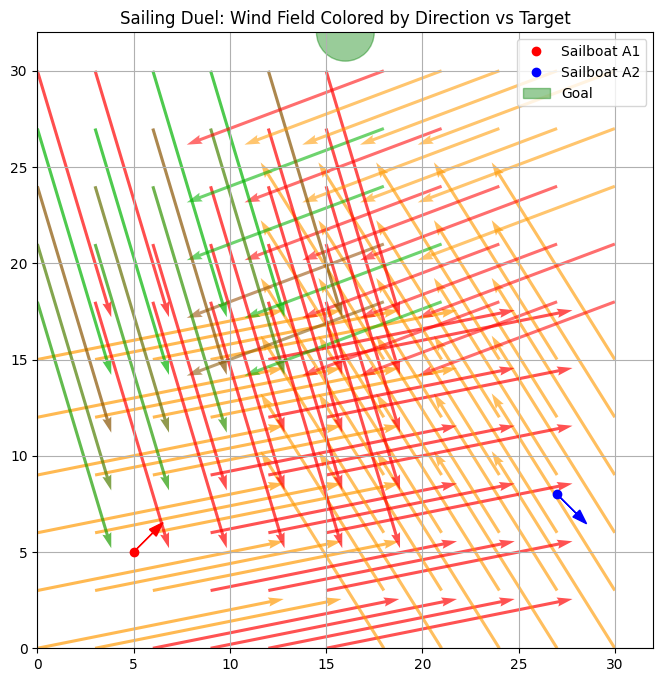

In [14]:
import numpy as np
import matplotlib.pyplot as plt

grid_size = 32
target = np.array([16, 32])

agent1 = np.array([5, 5])
agent2 = np.array([27, 8])
agent1_vel = np.array([1, 1])
agent2_vel = np.array([1, -1])

wind_field = np.zeros((grid_size, grid_size, 2))
zones = [
    ((0, 16), (0, 16), (1.0, 0.2)),
    ((0, 16), (16, 32), (-0.5, 0.8)),
    ((16, 32), (0, 16), (0.3, -1.0)),
    ((16, 32), (16, 32), (-0.8, -0.3))
]

for (x_start, x_end), (y_start, y_end), (wx, wy) in zones:
    wind_field[x_start:x_end, y_start:y_end, 0] = wx
    wind_field[x_start:x_end, y_start:y_end, 1] = wy

X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))

wind = wind_field.copy()
wind_strength = np.linalg.norm(wind, axis=2)

to_target = target - np.stack((X, Y), axis=2)
to_target_norm = np.linalg.norm(to_target, axis=2, keepdims=True)
to_target_dir = to_target / (to_target_norm + 1e-8)

dot_to_target = np.sum(wind * to_target_dir, axis=2)

colors = np.zeros((grid_size, grid_size, 4))

for i in range(grid_size):
    for j in range(grid_size):
        val = dot_to_target[i, j]
        strength = wind_strength[i, j]
        alpha = np.clip(strength / 1.5, 0, 1)
        
        if val < -0.5:
            colors[i, j] = (1, 0, 0, alpha)  # Red
        elif -0.1 <= val <= 0.1:
            colors[i, j] = (0, 0.7, 0, alpha)  # Green
        elif val > 0.5:
            colors[i, j] = (1, 0.6, 0, alpha)  # Yellow/Orange
        else:
            # Clamp interpolation parameter t between 0 and 1
            t = np.clip((val + 0.5) / 0.6, 0, 1)
            r = t
            g = 1 - t
            r = np.clip(r, 0, 1)
            g = np.clip(g * 0.7, 0, 1)
            colors[i, j] = (r, g, 0, alpha)

fig, ax = plt.subplots(figsize=(8, 8))

skip = 3
colors_flat = colors[::skip, ::skip].reshape(-1, 4)

ax.quiver(X[::skip, ::skip], Y[::skip, ::skip],
          wind[::skip, ::skip, 0], wind[::skip, ::skip, 1],
          color=colors_flat, scale=2.5, width=0.005)

ax.plot(agent1[0], agent1[1], 'ro', label='Sailboat A1')
ax.plot(agent2[0], agent2[1], 'bo', label='Sailboat A2')

ax.arrow(agent1[0], agent1[1], agent1_vel[0], agent1_vel[1], color='r', head_width=0.5)
ax.arrow(agent2[0], agent2[1], agent2_vel[0], agent2_vel[1], color='b', head_width=0.5)

goal_circle = plt.Circle(target, radius=1.5, color='green', alpha=0.4, label='Goal')
ax.add_patch(goal_circle)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_title("Sailing Duel: Wind Field Colored by Direction vs Target")
ax.set_aspect('equal')
ax.legend(loc='upper right')
plt.grid(True)
plt.show()


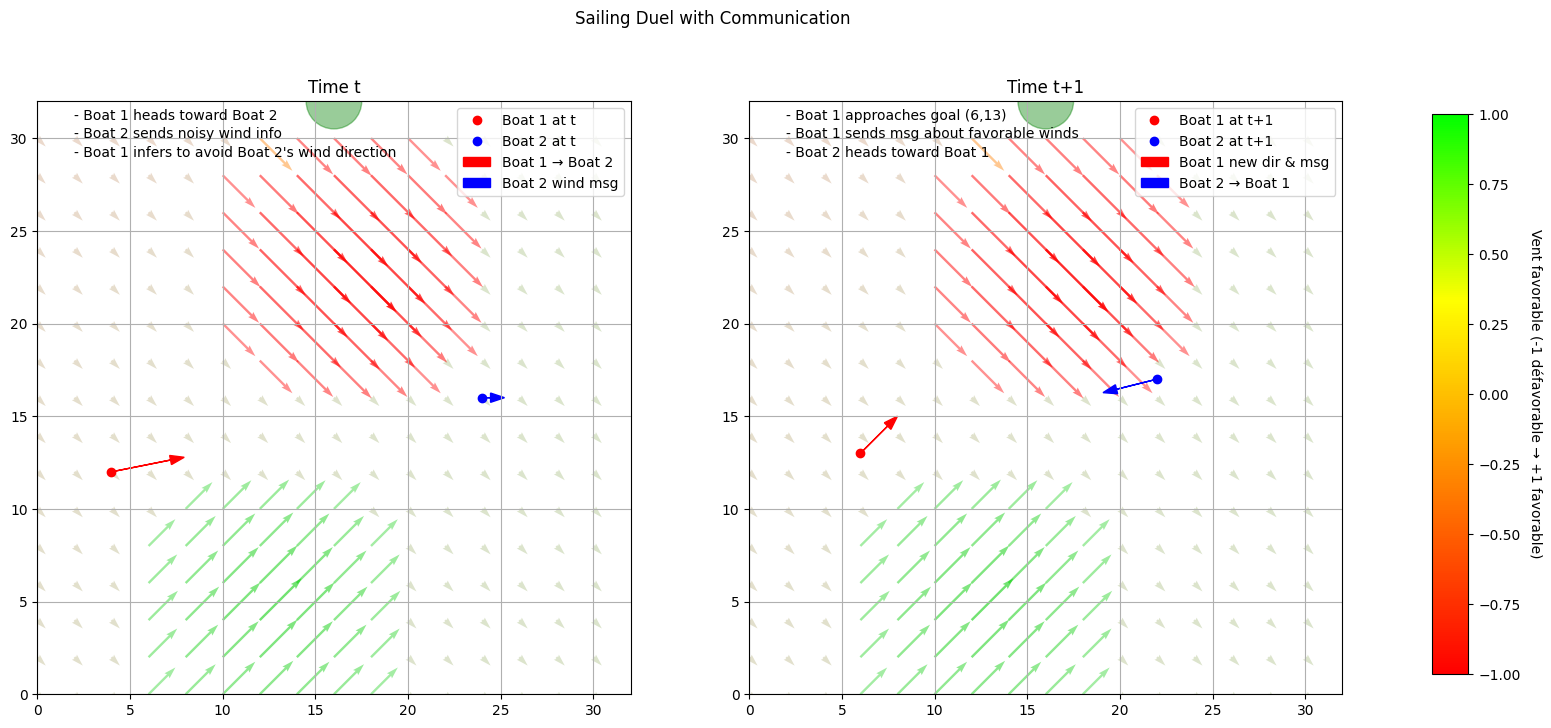

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

grid_size = 32
target = np.array([16, 32])  # Zone d'arrivée

# Positions bateaux à t et t+1
agent1_t = np.array([4, 12])
agent2_t = np.array([24, 16])

agent1_t1 = np.array([6, 13])   # Se rapproche de l'objectif
agent2_t1 = np.array([22, 17])  # Se rapproche mais pas vers objectif

# Directions
se_dir = np.array([1, -1]) / np.linalg.norm([1, -1])  # sud-est
ne_dir = np.array([1, 1]) / np.linalg.norm([1, 1])    # nord-est

# Init champ vent avec vents faibles partout
wind_field = np.zeros((grid_size, grid_size, 2))

for i in range(grid_size):
    for j in range(grid_size):
        base_wind = se_dir * 0.2  # vent faible partout
        dist1 = np.linalg.norm(np.array([i, j]) - agent1_t)
        dist2 = np.linalg.norm(np.array([i, j]) - agent2_t)

        # Vent favorable autour bateau 1 (nord-est, rayon 8)
        if dist1 < 8:
            intensity = 0.6 + 0.4 * (1 - dist1 / 8)
            wind = ne_dir * intensity
        # Vent défavorable autour bateau 2 (sud-est, rayon 8)
        elif dist2 < 8:
            intensity = 1.5 - 0.8 * (dist2 / 8)
            wind = se_dir * intensity
        else:
            wind = base_wind

        wind_field[i, j] = wind

# Fonction couleur selon vent (favorabilité/intensité)
def wind_color_map(wind, X, Y, target, agent1, agent2):
    wind_strength = np.linalg.norm(wind, axis=2)
    to_target = target - np.stack((X, Y), axis=2)
    to_target_norm = np.linalg.norm(to_target, axis=2, keepdims=True)
    to_target_dir = to_target / (to_target_norm + 1e-8)
    dot_to_target = np.sum(wind * to_target_dir, axis=2)

    colors = np.zeros((grid_size, grid_size, 4))
    for i in range(grid_size):
        for j in range(grid_size):
            val = dot_to_target[i, j]
            strength = wind_strength[i, j]
            alpha = np.clip(strength / 1.8, 0.2, 1)

            dist1 = np.linalg.norm(np.array([i, j]) - agent1)
            dist2 = np.linalg.norm(np.array([i, j]) - agent2)

            if dist2 < 8:
                # Bateau 2: vents rouges/oranges intenses (défavorable)
                if val > 0.2:
                    colors[i, j] = (1, 0.5, 0, alpha)  # orange vif
                else:
                    colors[i, j] = (1, 0, 0, alpha)  # rouge vif
            elif dist1 < 8:
                # Bateau 1: vents verts/oranges (favorable)
                if val > 0.4:
                    colors[i, j] = (0, 0.8, 0, alpha)  # vert vif
                else:
                    colors[i, j] = (1, 0.5, 0, alpha)  # orange vif
            else:
                # Zones neutres: jaune-vert dégradé selon dot product
                t = np.clip((val + 0.5), 0, 1)
                r = np.clip(t, 0, 1)
                g = np.clip((1 - t)*0.7, 0, 1)
                colors[i, j] = (r, g, 0, alpha)
    return colors

X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
colors = wind_color_map(wind_field, X, Y, target, agent1_t, agent2_t)

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

skip = 2
colors_flat = colors[::skip, ::skip].reshape(-1, 4)

# -- Temps t --
ax = axs[0]
q = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip],
              wind_field[::skip, ::skip, 0], wind_field[::skip, ::skip, 1],
              color=colors_flat, scale=10, width=0.004)

ax.plot(agent1_t[0], agent1_t[1], 'ro', label='Boat 1 at t')
ax.plot(agent2_t[0], agent2_t[1], 'bo', label='Boat 2 at t')

dir_1_to_2 = agent2_t - agent1_t
dir_1_to_2 = dir_1_to_2 / np.linalg.norm(dir_1_to_2) * 4
ax.arrow(agent1_t[0], agent1_t[1], dir_1_to_2[0], dir_1_to_2[1], 
         color='r', head_width=0.5, length_includes_head=True, label="Boat 1 → Boat 2")

ax.arrow(agent2_t[0], agent2_t[1], 1.2, 0, color='b', head_width=0.5, length_includes_head=True, label="Boat 2 wind msg")

#ax.text(2, 30, "T = t:", fontsize=12, weight='bold')
ax.text(2, 31, "- Boat 1 heads toward Boat 2", fontsize=10)
ax.text(2, 30, "- Boat 2 sends noisy wind info", fontsize=10)
ax.text(2, 29, "- Boat 1 infers to avoid Boat 2's wind direction", fontsize=10)

goal_circle = plt.Circle(target, radius=1.5, color='green', alpha=0.4)
ax.add_patch(goal_circle)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.set_title("Time t")
ax.grid(True)
ax.legend(loc='upper right')

# -- Temps t+1 --
ax = axs[1]
q2 = ax.quiver(X[::skip, ::skip], Y[::skip, ::skip],
               wind_field[::skip, ::skip, 0], wind_field[::skip, ::skip, 1],
               color=colors_flat, scale=10, width=0.004)

ax.plot(agent1_t1[0], agent1_t1[1], 'ro', label='Boat 1 at t+1')
ax.plot(agent2_t1[0], agent2_t1[1], 'bo', label='Boat 2 at t+1')

# Nouvelle direction bateau 1 vers nord-est (vent favorable)
dir_1_new = np.array([2, 2])
ax.arrow(agent1_t1[0], agent1_t1[1], dir_1_new[0], dir_1_new[1], 
         color='r', head_width=0.5, length_includes_head=True, label="Boat 1 new dir & msg")

# Bateau 2 se dirige vers bateau 1 (mais pas encore dessus)
dir_2_to_1 = agent1_t1 - agent2_t1
dir_2_to_1 = dir_2_to_1 / np.linalg.norm(dir_2_to_1) * 3
ax.arrow(agent2_t1[0], agent2_t1[1], dir_2_to_1[0], dir_2_to_1[1], 
         color='b', head_width=0.5, length_includes_head=True, label="Boat 2 → Boat 1")

#ax.text(2, 30, "T = t+1:", fontsize=12, weight='bold')
ax.text(2, 31, "- Boat 1 approaches goal (6,13)", fontsize=10)
ax.text(2, 30, "- Boat 1 sends msg about favorable winds", fontsize=10)
ax.text(2, 29, "- Boat 2 heads toward Boat 1", fontsize=10)

goal_circle = plt.Circle(target, radius=1.5, color='green', alpha=0.4)
ax.add_patch(goal_circle)

ax.set_xlim(0, grid_size)
ax.set_ylim(0, grid_size)
ax.set_aspect('equal')
ax.set_title("Time t+1")
ax.grid(True)
ax.legend(loc='upper right')

# -- Colorbar légende des vents --
fig.subplots_adjust(right=0.85)
cax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # axe colorbar à droite

cmap = mcolors.LinearSegmentedColormap.from_list("wind_cmap",
                                                [(1,0,0), (1,0.5,0), (1,1,0), (0,1,0)])

norm = mcolors.Normalize(vmin=-1, vmax=1)  # -1 vent défavorable max, +1 favorable max

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Vent favorable (-1 défavorable → +1 favorable)', rotation=270, labelpad=15)

plt.suptitle("Sailing Duel with Communication")
plt.show()
